<a href="https://colab.research.google.com/github/KarinKnopper/HovedopgaveGEV/blob/main/HovedopgaveGEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indledning
**Forecasting af fjernvarmeforbrug i Grindsted**

Et afgangsprojekt af Youssef Matthiesen (YMA) og Karin Knopper (KKN) på vegne af GEV i Grindsted.

Dansk titel:

Integration af sæsonmæssig autoregressiv integreret glidegennemsnit med exogene variabler (SARIMAX) til forbedret tidsserieforudsigelse i meteorologiske data

Engelsk titel:

Integrating Seasonal Autoregressive Integrated Moving Average with Exogenous Variables (SARIMAX) for Enhanced Time-Series Forecasting in Meteorological Data


##Forord
KKN

Vores projekt omhandler dataanalyse og kort fortalt har det 5 hovedelementer:

- Defination af spørgsmålet
- Indsamling af data
- Vask af data
- Analyse af data
- Oprettelse af visualiseringer og deling af indsigt


## Hvad er GEV Varme A/S?
KKN

GEV Varme A/S forsyner omkring 3.600 husstande i Grindsted og Stenderup-Krogager med fjernvarme.

Der bliver produceret ca 100.000 kilowatt-timer pr år og der bliver købt brændsel for ca 30 millioner pr år, så selv en besparelse på 1% vil betyde meget for økonomien.

Danmark har en plan om at være 100% fri for fossile brændstoffer som gas og olie i 2050, men GEV har en plan om at være det allerede i 2030 og på nuværende tidspunkt er GEV oppe på, at ca 93% er fra vedvarende energikilder.

Det er vigtigt at kunne levere en stabil fjernvarme, men produktion af fjernvarme er ikke en simpel opgave. Det er vanskeligt at udarbejde en sikker prognose for fjernvarmebehovet og uden en god prognose er det ofte nødvendigt at supplere anvendelsen af biobrændsel med gas og el.
Samtidig med, at man skal tage hensyn til miljøet og omkostningerne, skal man også sørge for, at der er varme nok til forbrugerne. Der er et fast behov til f.eks. brusebad og opvask, men derudover er der en masse behov, der ændres hele tiden og reaktionstiden for biobrændsel gør, at man ikke kan skrue hurtigt op og ned for varmeproduktionen.

Den varme GEV leverer, består af ca 74% overskudsvarme fra virksomheden IFF, der producerer ingredienser til fødevareindustrien.
IFF har deres egen fliskedel og i forbindelse med produktionen opstår der overskudsvarme, der sendes ud i fjernvarmenettet. Den flis der bruges, skal stamme fra bæredygtig skovhugst.

Resten af varmen er fordelt på ca 12% fra GEV's eget flisværk, 10 % fra en elpatron og det sidste produceres på gaskedler.
Gas dækker kun en meget lille procentdel af varmebehovet og bruges i de fleste tilfælde kun til at dække varmebehovet i de koldeste perioder.

Når IFF kører normalt ved de, hvor meget varme de producerer, men i tilfælde af driftstop, planlagt eller uplanlagt, er der en lang liste af beslutninger, der skal tages:
- Hvor lang tid tager driftsstoppet?
- Hvor meget varme skal der produceres i den periode?
- Hvad er opstartstiden på de forskellige alternativer?
- Hvad er prisen her og nu på alternativerne?

Det vi kan hjælpe med her, er at komme med et estimat på varmebehovet i den pågældende periode.

<br>

GEV ønsker at udfase naturgas og træflis og for at finde det rette alternativ, er det nødvendigt at kende varmeforbruget. For ikke at være så afhængige af een virksomhed (IFF) ser GEV på om øget elektrificering (elektrolyse?) og solceller (VE?) kan være en løsning. Elektrolyse kan blandt andet bruges til at rense den forurening, der er under Grindsted by. Elektrolyse danner overskudsvarme, der så kan føres til fjernvarmeanlægget og dermed skaffe billig fjernvarme til borgerne samtidig med, at forureningen forsvinder. Dette er dog udenfor opgavens scope.

Elpriser og $\text{CO}_2$ udledning er også udenfor denne opgaves scope.

## Problemformulering

Til hverdag kan IFF ret præcist sige, hvor meget varme de producerer, men i de tilfælde, hvor IFF har driftsstop, har GEV's varmemester brug for at kende det forventede varmebehov de næste par dage, så han kan tage en kvalificeret beslutning om, hvilken alternativ varmekilde, der vil være bedst at bruge.

GEV ønsker at mindske $\text{CO}_2$ aftrykket for fjernvarmeproduktion, så vi skal undersøge, om man kan bruge machine learning til at forudsige varmeforbruget de næste 7 dage, så varmemesteren kan lave en fyringsprofil, der tager hensyn til omkostning, $\text{CO}_2$ belastning, spild og tekniske begrænsninger i anlægget.


##Kravsanalyse
YMA & KKN


I vores projekt har vi anvendt FURPS til at kategorisere og prioritere de forskellige krav til vores program.


(F) Funktionalitet

- Det skal være et aflæsningsværktøj, der skal være i stand til at lave et estimat på fremtidigt varmebehov.
- Det skal hente historiske forbrugsdata fra GEV.
- Det skal hente historiske vejrdata fra et meteorologisk institut gennem et API.
- Det skal hente en 7 døgns vejrprognose.
- Det skal være i stand til løbende at optimere ved hjælp af machine learning.
- Det skal vise resultatet i Power BI.

(U) Brugervenlighed

- Varmemesteren skal kunne bruge programmet efter oplæring.


(R) Pålidelighed

- Afhængig af, at det meteorologiske instituts API overholder det format de beskriver i deres dokumentation.
- Afhængig af, at formatet af de eksports, der modtages fra GEV ikke ændrer sig
- Afhængig af det meteorologiske instituts datakvalitet/vægt af data.

(P) Ydeevne

- Der skal komme et svar inden for en rimelig tidsgrænse.

(S) Supportegnethed

- Uafhængig af den maskine det kører på
- Standard programmeringssprog
- Data skal gemmes i et standard databaseprogram.

##Afgrænsning

KKN

Vi har valgt at beregne forbruget på dagsniveau og ikke timeniveau. En opgradering i nær fremtid bliver at få forbruget beregnet på timeniveau, så man får et mere præcist resultat.

Vi bruger minimal tid på datavask, da de data vi bruger, allerede er blevet vasket. Vi tjekker for outliers og at formatet er korrekt.

Vi beregner ikke sektioneret forbrug, da Grindsted endnu ikke har fået delt deres varmeflow ind i sektioner, som de har gjort med vandforsyningen. Det bliver udført engang i fremtiden og så vil systemet blive optimeret til den tid.

Vi beregner ikke omkostninger og $\text{CO}_2$ forbrug ved anvendelse af de forskellige varmekilder, da det er varmemesterens ansvar. En mulig udvidelse kunne være at få integreret disse parametre i programmet.



##Metode

###Systemudviklingsmetode


Af YMA



Scrum er en agil projektstyringsmetode, der bruges i softwareudvikling. Det er valgt, fordi det understøtter hurtig og fleksibel udvikling, hvilket er ideelt i projekter med skiftende krav eller når hurtig levering er afgørende.

**Kerneelementer i Scrum:**

Sprints: Korte, faste arbejdsperioder (normalt 2-4 uger), hvor et bestemt arbejdsomfang fuldføres.

  Product Backlog: En prioriteret liste over projektets arbejdsopgaver.

  Sprint Planning: Planlægning af, hvilke opgaver der skal udføres i den næste sprint.

  Daily Stand-up: Dagligt kort møde for statusopdateringer og koordinering.

  Sprint Review: Evaluering af arbejdet fuldført i sprinten.

  Sprint Retrospective: Refleksion over det forløbne sprint for at forbedre processen. Scrum fremmer samarbejde, fleksibilitet, og kontinuerlig forbedring. Det er ideelt til komplekse projekter, hvor kravene udvikler sig, og hvor hurtig reaktion på ændringer er nødvendig.

###Værktøjer
KKN & YMA

####Kombineret Brug af Scrum og Extreme Programming
I vores projekt valgte vi en hybrid tilgang, der integrerer Scrum's fleksibilitet og strukturerede projektstyring med specifikke elementer fra Extreme Programming (XP), især Pair Programming. Denne kombination blev valgt for at udnytte styrkerne ved begge metoder og skabe et mere robust og effektivt arbejdsmiljø.
####Begrundelse for Valg af Scrum
Scrum blev valgt på grund af dets adaptiv planlægning, hurtige respons på ændringer og iterative udviklingscyklusser. Disse egenskaber har vist sig at være yderst effektive i et dynamisk projektlandskab, hvor krav og prioriteringer kan ændre sig.
####Integration af Pair Programming
Integration af Pair Programming fra XP: For at forstærke kvaliteten og effektiviteten i vores kodeudviklingsproces, inkorporerede vi Pair Programming, en praksis hentet fra Extreme Programming. Denne teknik involverer, at to udviklere arbejder sammen ved en enkelt computer – en skriver koden (driveren), mens den anden gennemgår hver kodelinje (observatøren). Dette fremmer ikke kun kodekvalitet gennem kontinuerlig gennemgang, men styrker også samarbejdet og vidensdeling blandt teammedlemmer.

####Fordele ved Pair Programming
Fordele ved Pair Programming i Scrum Miljøet: Integrationen af Pair Programming i vores Scrum-ramme har bidraget til en forbedret problemløsning, fejlfinding og innovation. Det har også fremmet en stærkere samarbejdskultur, hvilket er afgørende i Scrum's teamorienterede tilgang. Denne metode har vist sig at være særligt effektiv under komplekse opgaver, hvor to sæt øjne har været afgørende for at identificere og løse problemer hurtigere end ved individuelt arbejde.

####Projektets Fremdrift med Pair Programming
Påvirkning på Projektets Fremdrift med Pair Programming: Ved at implementere Pair Programming, observerede vi en mærkbar forbedring i kodekvaliteten og en reduktion i antallet af fejl. Dette førte til færre tidskrævende fejlrettelser og en mere strømlinet udviklingsproces. Desuden bidrog den øgede kommunikation og samarbejde mellem udviklere til en mere sammenhængende og produktiv arbejdsstil.

####Teknologivalg og Værktøjsbegrundelse
Sådan Formede Vores Værktøjer Projektets Succes

####FURPS til Kravsanalyse:
I vores projekt valgte vi FURPS-modellen til kravsanalyse, da den effektivt dækker fem grundlæggende aspekter: Funktionalitet, Brugervenlighed, Pålidelighed, Performance og Supportability. Denne model hjalp os med at identificere og prioritere nøglefunktionerne i vores tidsserie forudsigelsessystem. For eksempel, under Funktionalitet, fokuserede vi på nødvendige data inputs og forventede output, mens Brugervenlighed hjalp os med at overveje brugerinterfacet og interaktionen med systemet. Pålidelighedsaspektet sikrede, at systemet kunne køre stabilt over tid, og Performance-delen gjorde det muligt for os at optimere systemets responstid og effektivitet. Endelig sikrede Supportability, at vores system var vedligeholdelsesvenligt og skalerbart.

####Valg af Trello:
Trello blev valgt som vores organisatoriske værktøj, primært på grund af dets enkle, brugervenlige interface og fleksibilitet. Det muliggjorde en effektiv styring af projektets mange opgaver og deadlines. Gennem brugen af Trellos boards, lister og kort, kunne vi nemt organisere og prioritere arbejdsopgaver, spore projektets fremskridt og fremme transparent kommunikation mellem teammedlemmerne. Dette værktøj var afgørende for at holde teamet på sporet og sikre, at alle dele af projektet blev udført til tiden.

####Programmering i Python:
Valget af Python som vores programmeringssprog var afgørende for projektets succes inden for dataanalyse. Python er kendt for sin omfattende støtte til dataanalyse og -behandling, med et rigt udvalg af biblioteker som Pandas for datahåndtering, NumPy for numeriske operationer og Matplotlib for datavisualisering. Disse biblioteker gjorde det muligt for os at manipulere komplekse datasæt, udføre statistisk analyse og generere indsigtsfulde visualiseringer, hvilket er afgørende for nøjagtig tidsserieforudsigelse.

####Brugen af Jupyter Notebook:
Jupyter Notebook blev valgt som vores primære værktøj til at skrive og præsentere rapporten, da det tilbyder en integreret udviklingsmiljø, der er perfekt til Python. Med Jupyter kunne vi nemt kombinere kode, tekst og visualiseringer i en og samme dokument, hvilket gjorde det muligt at fremstille komplekse analytiske processer og resultater på en klar og forståelig måde. Denne tilgang var særligt nyttig for at demonstrere dataanalyseprocesserne og resultaterne på en sammenhængende måde, hvilket var essentielt for både teknisk og ikke-teknisk publikum.

####GitHub Repository:
Oprettelsen af et GitHub-repository spillede en nøglerolle i vores projektstyring og kodesamarbejde. Det gav os en central platform til versionskontrol, hvilket var afgørende for at håndtere ændringer i kodebasen effektivt og uden konflikter. Gennem GitHub kunne vi også nemt dele vores kode og fremskridt med teammedlemmer og vejledere, hvilket fremmede gennemsigtighed og samarbejde i hele projektets varighed.



<br>
<br>

Jupyter notebook

https://colab.research.google.com/drive/1FCSXWJXyRDVyWvnWyk79W7I1pGBN005a#scrollTo=QOL7Ugf1svh6

<br>

Github repository

https://github.com/KarinKnopper/HovedopgaveGEV


###User stories
KKN





Vores projekt har kun en user story.

<br>

*'Som varmemester vil jeg gerne have et program, der kan hjælpe med at estimere varmeforbruget de næste 7 døgn, så jeg kan lave en optimal fyringsprofil.'*

<br>

Til den user story er der følgende requirements:


- Programmet skal kunne hente historiske vejrdata fra de sidste 3 år via et API.
- Programmet skal kunne hente historiske varmeforbrugsdata fra de sidste 3 år
- Programmet skal ved hjælp af time series forecasting kunne træne disse data
- For at kunne se forbruget på timebasis skal datamålepunkterne være på timebasis eller mindre.
- Programmet skal kunne hente en 7 døgns vejrprognose, så den kan bruge algoritmen fra træningen til at estimere de næste 7 dages varmebehov.
- Programmet skal lave et heatmap over Grindsted by, så man kan se, hvordan varmebehovet er fordelt i byen.
- Resultatet skal kunne vises i Power BI.



###Sprints

YMA

**Sprint 1:** Opsætning og dataindsamling

Backlog: Opsætte projektets infrastruktur, udvikle API-kald til vejrdata, indsamle 7 dages vejrudsigt.

Mål: Funktionel API-integration og indledende dataindsamling.
<br>

**Sprint 2:** Dataopbevaring og -integration

Backlog: Implementere databasestruktur, integrere indsamlede data, starte indsamling af historiske data.

Mål: Stabil datalagring og begyndende dataintegration.
<br>

**Sprint 3:** Maskinlæring og modellering

Backlog: Designe og implementere den indledende maskinlæringsmodel, foretage første træning og evaluering.

Mål: En grundlæggende maskinlæringsmodel til forudsigelse af forbrug.
<br>

**Sprint 4:** Finjustering og evaluering

Backlog: Finjustere maskinlæringsmodellen, implementere yderligere datarensning og forbehandling, evaluere modellens nøjagtighed.

Mål: Forbedret prognosenøjagtighed og modelrobusthed.
<br>

#Eksekvering
ca 15 sider


beskriv datarens, fremgangsmetode, dokumentation
Problemstilling ved manipukation af data

In [ ]:
!pip  install openmeteo-requests

In [ ]:
!pip install requests-cache retry-requests numpy pandas

In [ ]:
#Hent alle de biblioteker der skal bruges
import requests
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
#import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
# Hent bibliotek til billeder
from IPython.display import Image, display

##Domænemodel YMA

Domænemodel Beskrivelse

I din domænemodel for vejrdataindsamling og forbrugsforudsigelse er der flere nøgleelementer:

Lokation: Repræsenterer geografiske data. Indeholder felter som bynavn, land, bredde- og længdegrader.

Vejrrekord: Omhandler specifikke vejrdata på en given dato. Linkes til en lokation og indeholder detaljer som temperatur, vindstyrke og -retning, samt solopgang og -nedgang.

Temperatur: Detaljeret data om temperatur, herunder maksimum, minimum og gennemsnit.

Vind: Information om vindforhold, inkluderer hastighed og retning.

Forbrugsforudsigelse: Resultater fra din maskinlæringsmodel. Omfatter forventet forbrug baseret på vejr og historiske data.

Hver af disse entiteter repræsenteres som en tabel i din database og har relationer til hinanden, hvilket sikrer en struktureret og effektiv datahåndtering.
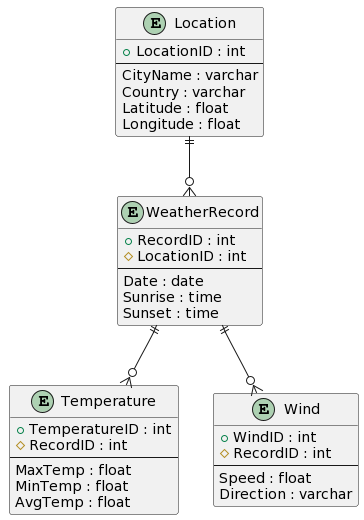

##Arkitektur Beskrivelse YMA
I vores projekt har vi designet et system, der består af flere integrerede moduler:

Dataindsamlingsmodulet: Dette modul er ansvarligt for at indsamle både vejr- og virksomhedsdata. Det gør brug af forskellige API'er til at trække data, som er nødvendige for vores analyser.

Databasemodulet: Her lagres alle indsamlede data. Vi har opsat tabeller for at organisere vejrdata, virksomhedsdata og de resultater, vi får fra vores forudsigelser.

Dataintegrationsmodulet: Dette modul arbejder med at kombinere virksomhedsdataene med vejrdataene, så de er klar til at blive analyseret i maskinlæringsmodulet.

Maskinlæringsmodulet: Her anvendes forskellige algoritmer til at generere forudsigelser baseret på de indsamlede data. Dette omfatter trin som dataforberedelse, modeltræning og evaluering af modellens præcision.

Resultatlagringsmodulet: Når forudsigelserne er lavet, gemmer vi dem i databasen, så de kan bruges senere.

Visualiseringsmodulet: Til sidst bruger vi Power BI til at visualisere både de rå data og vores forudsigelser. Det gør det nemmere for os at analysere resultaterne og træffe informerede beslutninger.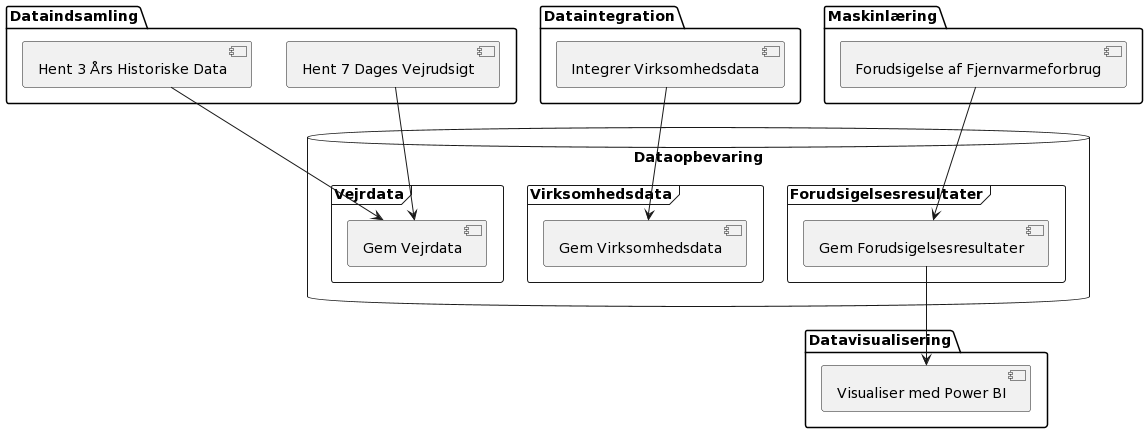

##Prototype
KKN

For at teste konceptet i vores idé, lavede vi en prototype på et mindre datasæt.

Pga begrænset adgang til vores rigtige database, lavede jeg en sql udsøgning, der kunne gemmes som en csv-fil.

Alle elmålere, vandmålere og varmemålere sender deres status hvert kvarter og disse målinger bliver gemt i vores database. Det er ikke kun selve målerstanden, men også ting som navn, adresse, installationsnummer, aftagernummer, status, firmanummer og mange, mange flere informationer, der bliver gemt. Der er ca. 500 tabeller (hvis det kan gøre det) og hver tabel har vel mellem 5 og 100 kolonner, så man skal nøje overveje, hvilke oplysninger man skal bruge og fra hvilke tabeller.

In [ ]:
# Hent bibliotek
#from IPython.display import Image, display

Tabel = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/Tabeludsnit.png'

# Display the image
display(Image(url=Tabel))


*Ovenover ses et udsnit af mængden af tabeller og kolonner*

<br>
<br>

Så hvad identificerer hvad, hvilke fællesnævnere er der og hvor mange tabeller er det nødvendigt at bruge?
Først skulle jeg finde ud af, hvilke oplysninger jeg skulle bruge.
Jeg startede med at udsøge oplysningerne på en enkelt installation. Faktisk startede jeg med en select * udsøgning og fik ca. en halv million hits, så jeg lærte at være lidt varsom med, hvad jeg bad om!
Så jeg begrænsede det til en installation og en dag. Her kunne jeg så eksperimentere med at finde alle værdier og summe dem. Dernæst kunne jeg teste, om det virkede med 2 og 3 installationer. Jeg blev også lidt overmodig og prøvede at summe hele Grindsted, men havde ikke helt styr på afgrænsningerne, så efter 4 minutter stoppede jeg forespørgslen…

I vores system er der data fra mange byer, så jeg skulle bruge et firmanummer, så jeg sikrede mig, at det kun var installationer i Grindsted, der blev søgt på. Dernæst skulle jeg bruge et installationsnummer. Her er der ofte 3 tidsserier tilknyttet: en til vand, en til varme-flow og en til varmeforbrug. De to sidste har betydning for forbruget, så de skulle begge med. Forbruget bliver målt i kWh og flow’et i m3, så jeg ville gerne have enheder med for klarhedens skyld. Så skulle jeg selvfølgelig have en dato med og et forbrug. Jeg kunne også vælge at sikre mig, at installationen var aktiv, men når jeg udsøger forbrug, kommer der automatisk kun de installationer med, der har værdier, så for at gøre det mere overskueligt, valgte jeg kun at have et minimum antal informationer med.
Jeg kunne heldigvis nøjes med 4 tabeller: AINSD, BATIDSNR, TimeSeriesValues og som konnektor skulle jeg bruge ABATS.
Til vores prototype, har vi i første omgang valgt at udregne forbrug pr døgn. Så kan vi altid ændre det til time eller kvarter, når vi begynder at arbejde med live data.
Jeg startede med at lave en query, der fandt alle kvartersværdierne på begge tidsserierne i en given tidsperiode. Den query lavede jeg så til en subquery i en ny query, hvor jeg lagde alt forbruget pr døgn sammen i de respektive tidsserier. Jeg valgte at nøjes med at søge på tre installationer pga. de store mængder data, der ellers skulle beregnes.

In [ ]:
SQL = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/SQLSearch.png'

# Display the image
display(Image(url=SQL))

*Ovenover ses SQL udsøgningen til forbrug pr dag pr installation*

<br>
<br>

Efter at have gemt resultatet som csv, skulle det sættes ind i et excel-ark sammen med de vejrdata, jeg havde hentet fra DMI. Desværre er CSV-filer ikke altid ensbetydende med kommaseparerede filer, men kan også være kolon eller tabulator separerede, så det skulle lige køres en gang gennem notepad++, for blandt andet at ændre datoformatet, der skal være på en speciel måde for at python kan læse det problemfrit. Så var det klart til at blive gemt som en "ægte" csv-fil, der kunne uploades på github og derefter problemfrit indlæses i jupyter notebook.

Her var det så et spørgsmål om at finde og afprøve en af de utallige algoritmer, der findes til at træne et datasæt. Resultatet blev ikke ret præcist, men eftersom datasættet kun havde 61 punkter og forbruget kom fra 3 installationer, er det ikke noget, der bekymrer mig.


In [ ]:
Proto = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/Prototype-resultat.png'

# Display the image
display(Image(url=Proto))

*Resultatet af prototypen*

<br>
<br>

For hele prototypen se bilag.

##Fremvisning af produkt her

###Kode/ selve programmet

Python kode til at hente data 7 dage frem. (VERSION VIRKER KUN TIL 3 Dage fordi de er uden en fri plan.)


In [ ]:
#import requests

# Din API-nøgle
api_key = 'b727b356aa584f5d85893707231611'

# Forespørgslen på lokalitet
location = 'Grindsted, Denmark'  # Erstat med den ønskede lokalitet

# URL'en til Forecast API med parametre for 7 dages vejrudsigt
url = f'https://api.weatherapi.com/v1/forecast.json?key={api_key}&q={location}&days=7'

# Foretag API-kaldet
response = requests.get(url)

# Tjek om forespørgslen var vellykket
if response.status_code == 200:
    # Parse svaret til JSON
    forecast_data = response.json()['forecast']['forecastday']

    # Initialiser en ordbog til at lagre de nødvendige data
    weather_summary = {}

    # Løb igennem hver dags vejrudsigt
    for day_data in forecast_data:
        date = day_data['date']
        max_temp = day_data['day']['maxtemp_c']
        min_temp = day_data['day']['mintemp_c']
        avg_temp = day_data['day']['avgtemp_c']
        max_wind = day_data['day']['maxwind_kph']
        sunrise = day_data['astro']['sunrise']
        sunset = day_data['astro']['sunset']

        # Tilføj dataene til vores opsummeringsordbog
        weather_summary[date] = {
            'max_temp_c': max_temp,
            'min_temp_c': min_temp,
            'avg_temp_c': avg_temp,
            'max_wind_kph': max_wind,
            'sunrise': sunrise,
            'sunset': sunset
        }

    # Udskriv opsummeringsdataene
    for date, data in weather_summary.items():
        print(f"Dato: {date}")
        print(f"  Solopgang: {data['sunrise']}")
        print(f"  Solnedgang: {data['sunset']}")
        print(f"  Maksimal temperatur (°C): {data['max_temp_c']}")
        print(f"  Minimal temperatur (°C): {data['min_temp_c']}")
        print(f"  Gennemsnitlig temperatur (°C): {data['avg_temp_c']}")
        print(f"  Maksimal vindhastighed (kph): {data['max_wind_kph']}")
        print()

else:
    print('Kunne ikke hente data:', response.status_code)


Ny version a vejer api porgamm som henter data uden api nølge og er gratis up til 10000 kald.

Først skal da hentes med pip i **Powershell**:

**pip install** *openmeteo-requests*

**pip install** *requests-cache retry-requests numpy pandas*

In [ ]:
#import openmeteo_requests
#import requests_cache
#import pandas as pd
#from retry_requests import retry

# Opsætning af Open-Meteo API-klient med cache og gentagelsesforsøg ved fejl
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Sørg for, at alle nødvendige vejrvariabler er opført her
# Rækkefølgen af variabler i time- eller dagsdata er vigtig for korrekt tildeling nedenfor
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 55.7573,  # Breddegrad for placeringen
	"longitude": 8.9275,  # Længdegrad for placeringen
	"hourly": ["temperature_2m", "weather_code", "wind_speed_10m"],  # Timedata
	"daily": "sunshine_duration",  # Dagsdata
	"timezone": "Europe/Berlin"  # Tidszone for placeringen
}
responses = openmeteo.weather_api(url, params=params)

# Behandler første lokalitet. Tilføj en for-løkke for flere lokaliteter eller vejrmodeller
response = responses[0]
print(f"Koordinater {response.Latitude()}°E {response.Longitude()}°N")
print(f"Højde {response.Elevation()} m.o.h.")
print(f"Tidszone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Tidszone forskel til GMT+0 {response.UtcOffsetSeconds()} s")

# Behandler timebaserede data. Rækkefølgen af variabler skal være den samme som anmodet.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(2).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start=pd.to_datetime(hourly.Time(), unit="s"),
	end=pd.to_datetime(hourly.TimeEnd(), unit="s"),
	freq=pd.Timedelta(seconds=hourly.Interval()),
	inclusive="left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["weather_code"] = hourly_weather_code
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data=hourly_data)
print(hourly_dataframe)

# Behandler dagsbaserede data. Rækkefølgen af variabler skal være den samme som anmodet.
daily = response.Daily()
daily_sunshine_duration = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start=pd.to_datetime(daily.Time(), unit="s"),
	end=pd.to_datetime(daily.TimeEnd(), unit="s"),
	freq=pd.Timedelta(seconds=daily.Interval()),
	inclusive="left"
)}
daily_data["sunshine_duration"] = daily_sunshine_duration

daily_dataframe = pd.DataFrame(data=daily_data)
print(daily_dataframe)



###SARIMAX Kode for MWh

###SARIMAX Kode for Flow

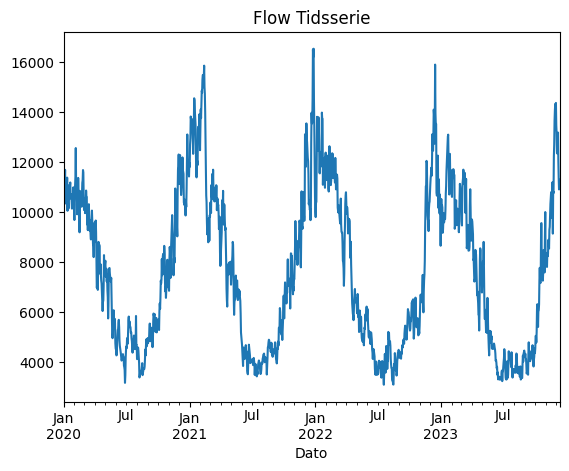

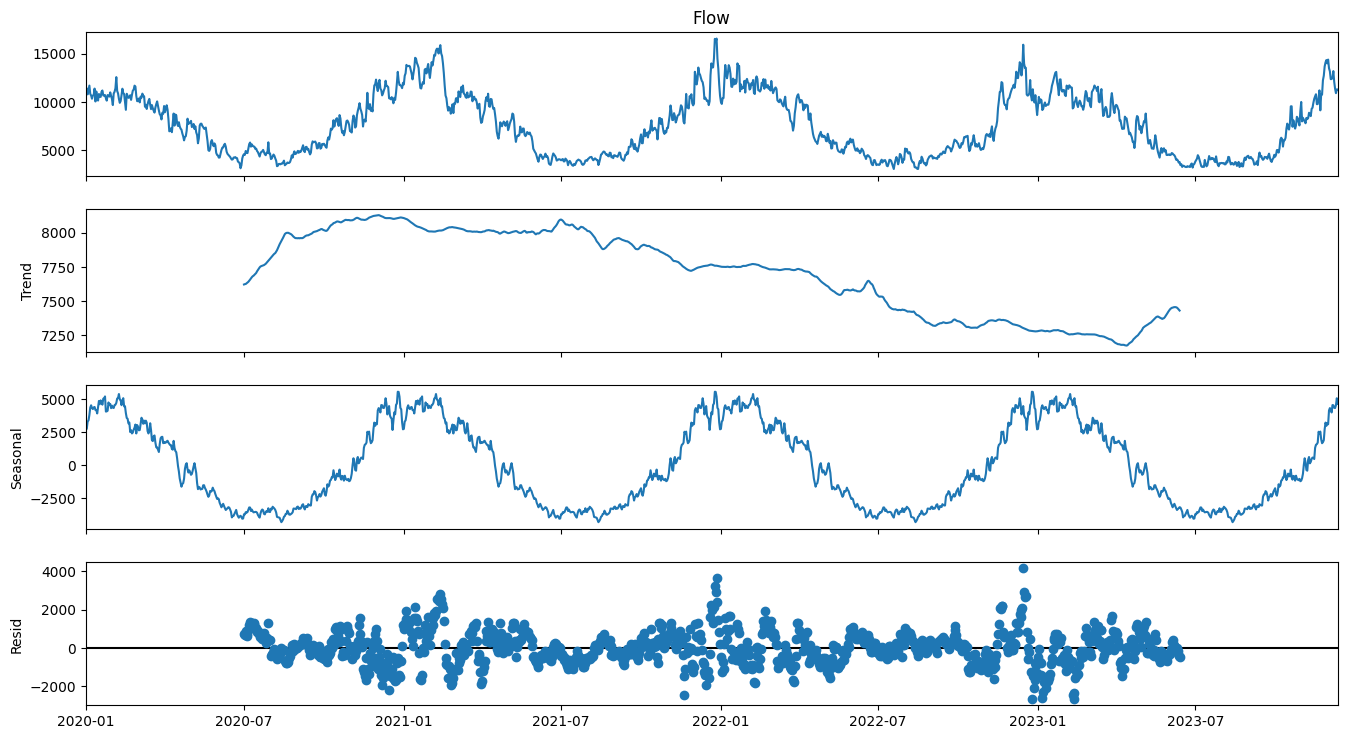

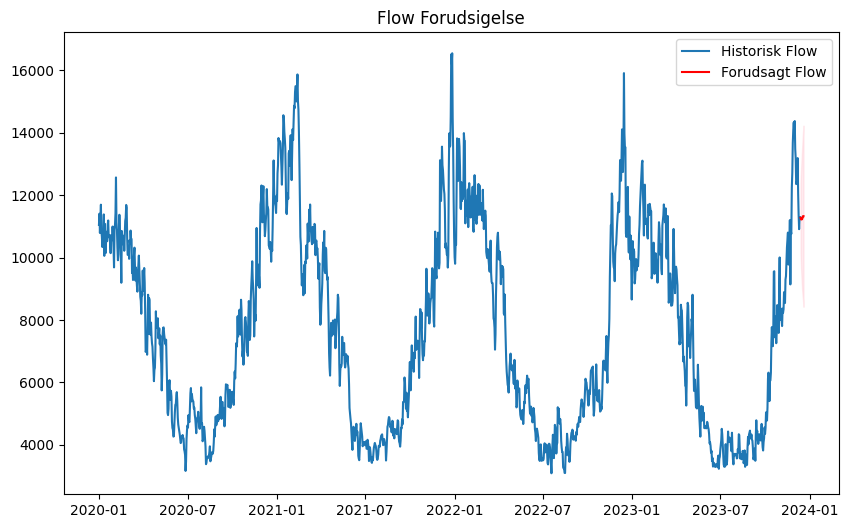

,Forudsagt Flow,Nedre grænse,Øvre grænse
2023-12-13 00:00:00,11275.29,10178.69,12371.88
2023-12-14 00:00:00,11221.81,9670.99,12772.63
2023-12-15 00:00:00,11241.19,9341.84,13140.55
2023-12-16 00:00:00,11229.09,9035.90,13422.28
2023-12-17 00:00:00,11273.69,8821.63,13725.75
2023-12-18 00:00:00,11330.44,8644.34,14016.54
2023-12-19 00:00:00,11328.68,8427.36,14229.99


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Indlæs CSV-fil med semikolon som separator og parse datoer i 'Dato' kolonnen
df = pd.read_csv('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDATA.csv', delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Specificer frekvensen for tidsrækken (daglig i dette eksempel)
df.index.freq = 'D'

# Erstat kommaer med punktum i 'Flow' kolonnen, konverter til float og afrund værdierne
df['Flow'] = df['Flow'].str.replace(',', '.').astype(float).round()

# Fjern rækker med manglende værdier i 'Flow'-kolonnen eller imputér dem
# Her bruger vi fremadfyldning for at imputere manglende værdier
df['Flow'].fillna(method='ffill', inplace=True)

# Plot tidsserien for 'Flow'
df['Flow'].plot()
plt.title('Flow Tidsserie')
plt.show()

# Sæsonmæssig dekomponering for at forstå sæsonmæssighed
# Her er daglige data over et år
decomposition = seasonal_decompose(df['Flow'], model='additiv', period=365)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Parametervalg for SARIMA-modellen
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Opret SARIMA-model og tilpas den til dataen
model = SARIMAX(df['Flow'], order=sarima_order, seasonal_order=seasonal_order)
results = model.fit()

# Forudsig de næste trin
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Gem forudsigelsesdataen som en CSV-fil (kan bruges hvis man vil køre koden lokalt)
#forecast_data = pd.DataFrame({'Forudsagt Flow': forecast_values})
#forecast_data.to_csv('/mnt/data/forecasting_Flow.csv')

# Plot forudsigelsen sammen med historiske data
plt.figure(figsize=(10, 6))
plt.plot(df['Flow'], label='Historisk Flow')
plt.plot(forecast_values, label='Forudsagt Flow', color='red')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Flow Forudsigelse')
plt.legend()
plt.show()

# Opret en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({'Forudsagt Flow': forecast_values,
                              'Nedre grænse': forecast_conf_int.iloc[:, 0],
                              'Øvre grænse': forecast_conf_int.iloc[:, 1]})

# Formatering for pænere visning
forecast_data_formatted = forecast_data.style.format({
    'Forudsagt Flow': '{:.2f}',
    'Nedre grænse': '{:.2f}',
    'Øvre grænse': '{:.2f}'
})

# Vis forudsigelsesdataen
forecast_data_formatted


###Test

####SARIMA-modellen

Første Test phase med SARIMA-modellen: (output er ikke det vi vil have man det er jo TEST ;-))!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Indlæs CSV-fil med semikolon som separator og parse datoer i 'Dato' kolonnen
df = pd.read_csv(r'file_path.csv', delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Erstat kommaer med punktum i 'MWh' kolonnen, konverter til float og afrund værdierne
df['MWh'] = df['MWh'].str.replace(',', '.').astype(float).round()

# Plot tidsserien for 'MWh'
df['MWh'].plot()
plt.title('MWh Tidsserie')
plt.show()

# Sæsonmæssig dekomponering for at forstå sæsonmæssighed
decomposition = seasonal_decompose(df['MWh'], model='additiv', period=365)  # Juster perioden efter behov
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Parametervalg for SARIMA-modellen
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(df['MWh'], order=sarima_order, seasonal_order=seasonal_order)
results = model.fit()

# Forudsig de næste trin
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot forudsigelsen sammen med historiske data
plt.figure(figsize=(10, 6))
plt.plot(df['MWh'], label='Historisk MWh')
plt.plot(forecast_values, label='Forudsigelse MWh', color='red')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('MWh Forudsigelse')
plt.legend()
plt.show()


####Validering og Indlæsning af Tidsrække Data fra CSV-fil - YMA

In [ ]:
import pandas as pd

# URL til den rå CSV-fil på GitHub
csv_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/Eksamen_data.csv'

# Indlæs CSV-filen uden at parse datoer for at tjekke kolonnerne
df = pd.read_csv(csv_url, delimiter=';')

# Udskriv kolonnerne i DataFrame
print(df.columns)

# Tjek om 'Dato' kolonnen findes i DataFrame
if 'Dato' in df.columns:
    # Hvis 'Dato' kolonnen eksisterer, indlæses dataen igen med dato-parsing
    df = pd.read_csv(csv_url, delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')
    print('Dato-parsing lykkedes.')
else:
    # Hvis 'Dato' kolonnen ikke findes, udskrives en fejlbesked
    print('Dato kolonnen blev ikke fundet i CSV.')


Index(['MWh', 'Flow', 'Middel vind', 'Middel temp', 'Sol i minutter', 'Dato'], dtype='object')
Dato-parsing lykkedes.


#### Første Data af trænings data - YMA

Jeg Tester Træningsmodelen ved at tage de sisdte 7 dage væk fra cav. filen og
sammen ligener med hvor forcast, hvis det passer så er denne model ihvertfald en kandidat til at arbejder vidre med.

Det første jeg gøre er at slete det sidste 7 rækker fra csv. filen og oploade på github.

Efter det ændre jeg koden så at den henter de rigtig data: resulat nedunder!

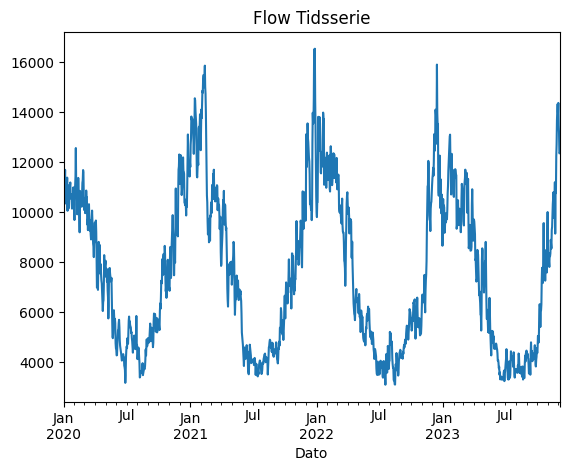

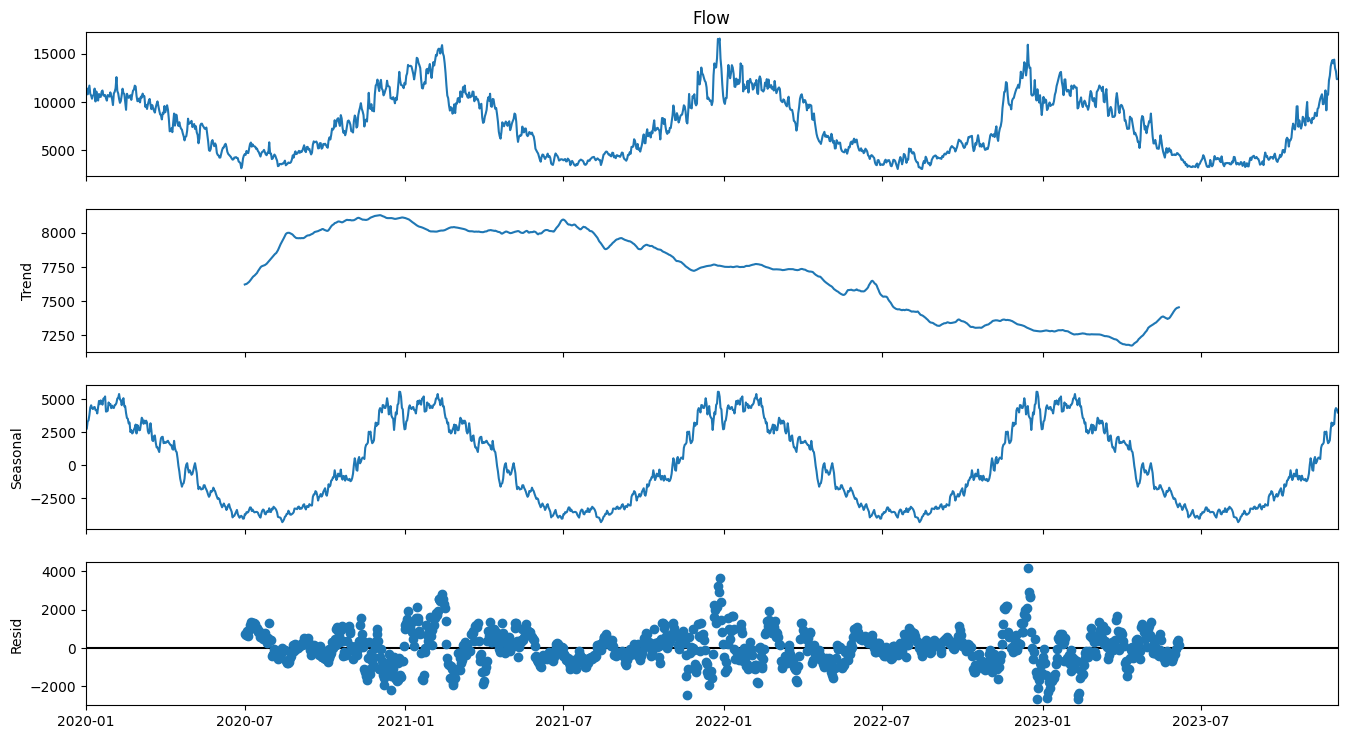

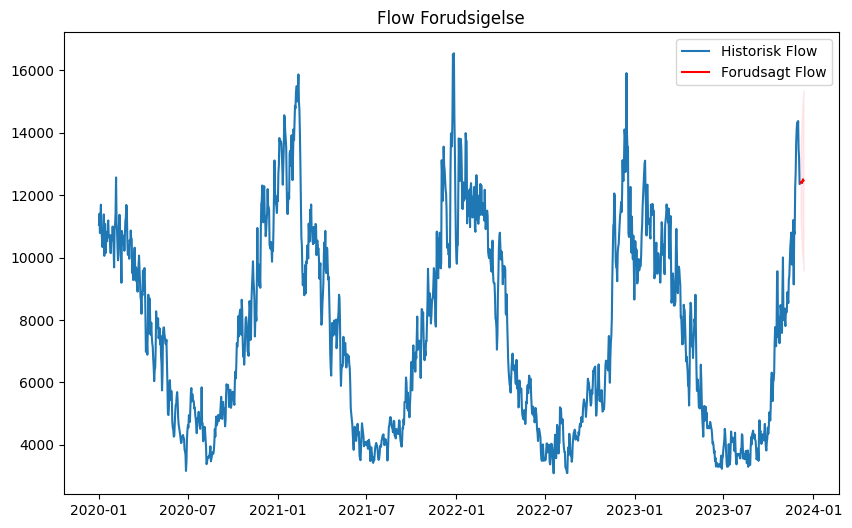

,Forudsagt Flow,Nedre grænse,Øvre grænse
2023-12-06 00:00:00,12416.97,11326.34,13507.61
2023-12-07 00:00:00,12424.75,10882.36,13967.13
2023-12-08 00:00:00,12420.43,10531.40,14309.46
2023-12-09 00:00:00,12389.67,10208.40,14570.93
2023-12-10 00:00:00,12469.50,10030.77,14908.23
2023-12-11 00:00:00,12509.07,9837.58,15180.55
2023-12-12 00:00:00,12470.55,9585.02,15356.07


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Indlæs CSV-fil med semikolon som separator og parse datoer i 'Dato' kolonnen
df = pd.read_csv('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest01.csv', delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Specificer frekvensen for tidsrækken (daglig i dette eksempel)
df.index.freq = 'D'

# Erstat kommaer med punktum i 'Flow' kolonnen, konverter til float og afrund værdierne
df['Flow'] = df['Flow'].str.replace(',', '.').astype(float).round()

# Fjern rækker med manglende værdier i 'Flow'-kolonnen eller imputér dem
# Her bruger vi fremadfyldning for at imputere manglende værdier
df['Flow'].fillna(method='ffill', inplace=True)

# Plot tidsserien for 'Flow'
df['Flow'].plot()
plt.title('Flow Tidsserie')
plt.show()

# Sæsonmæssig dekomponering for at forstå sæsonmæssighed
# Her er daglige data over et år
decomposition = seasonal_decompose(df['Flow'], model='additiv', period=365)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Parametervalg for SARIMA-modellen
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Opret SARIMA-model og tilpas den til dataen
model = SARIMAX(df['Flow'], order=sarima_order, seasonal_order=seasonal_order)
results = model.fit()

# Forudsig de næste trin
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Gem forudsigelsesdataen som en CSV-fil (kan bruges hvis man vil køre koden lokalt)
#forecast_data = pd.DataFrame({'Forudsagt Flow': forecast_values})
#forecast_data.to_csv('/mnt/data/forecasting_Flow.csv')

# Plot forudsigelsen sammen med historiske data
plt.figure(figsize=(10, 6))
plt.plot(df['Flow'], label='Historisk Flow')
plt.plot(forecast_values, label='Forudsagt Flow', color='red')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Flow Forudsigelse')
plt.legend()
plt.show()

# Opret en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({'Forudsagt Flow': forecast_values,
                              'Nedre grænse': forecast_conf_int.iloc[:, 0],
                              'Øvre grænse': forecast_conf_int.iloc[:, 1]})

# Formatering for pænere visning
forecast_data_formatted = forecast_data.style.format({
    'Forudsagt Flow': '{:.2f}',
    'Nedre grænse': '{:.2f}',
    'Øvre grænse': '{:.2f}'
})

# Vis forudsigelsesdataen
forecast_data_formatted


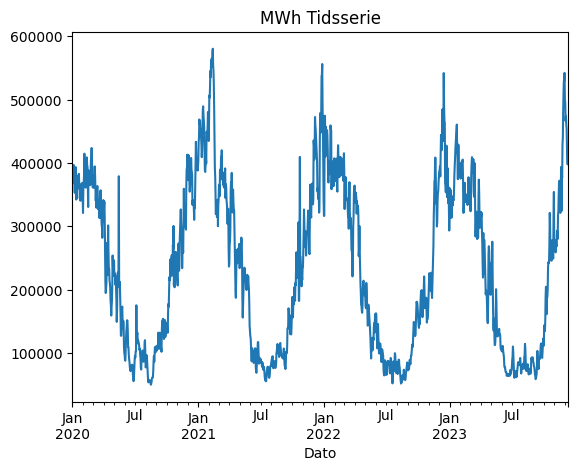

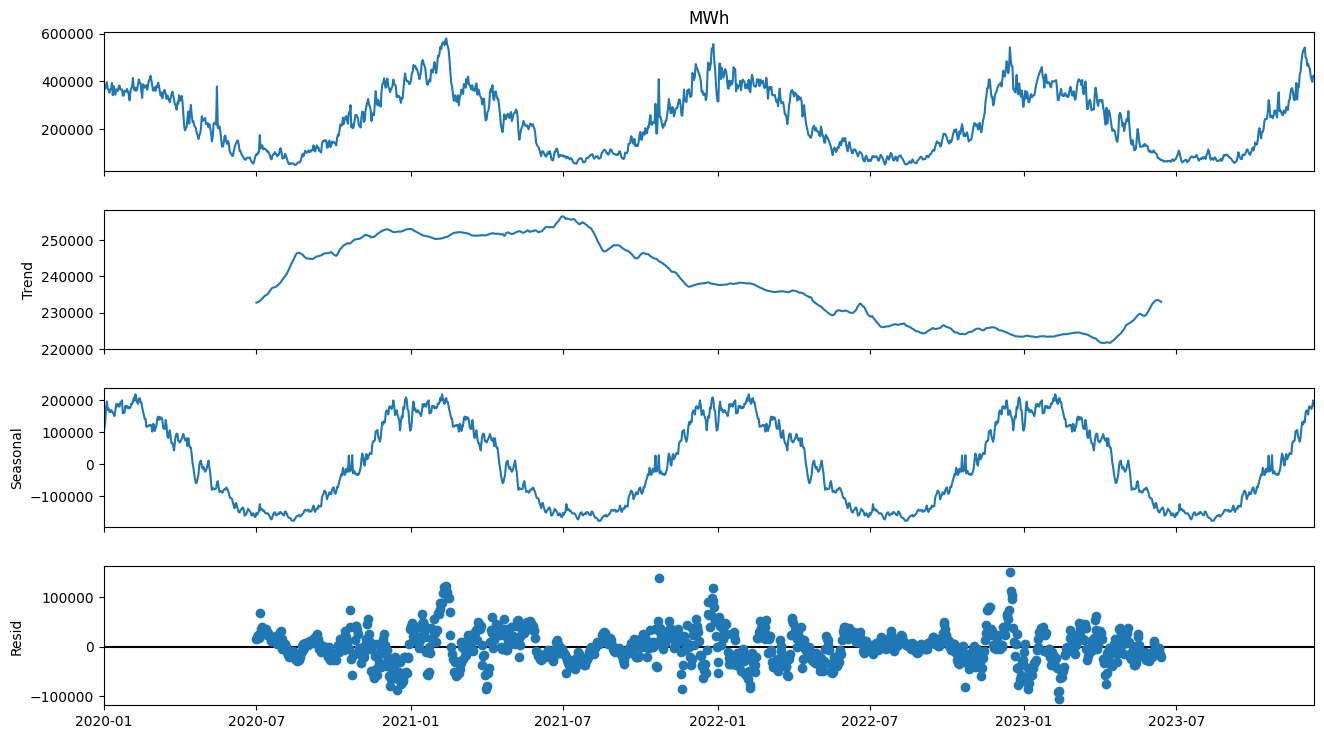

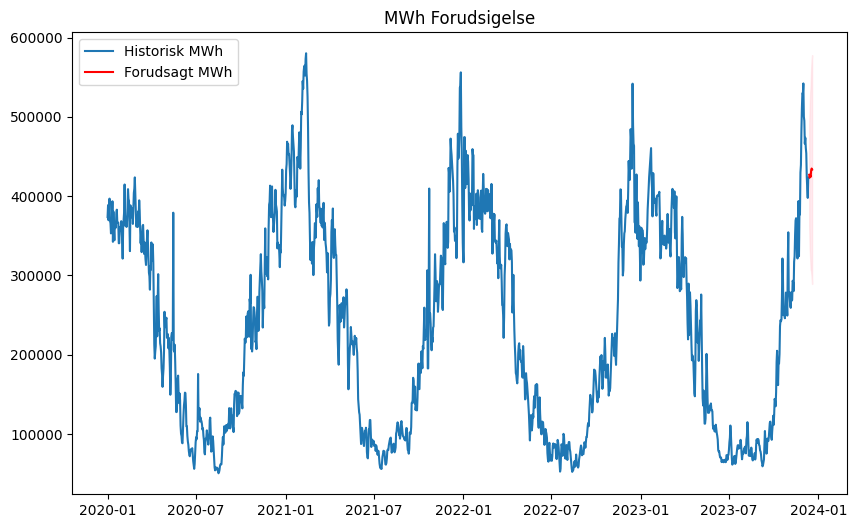

,Forudsagt MWh,Nedre grænse,Øvre grænse
2023-12-13 00:00:00,426997.07,362329.02,491665.11
2023-12-14 00:00:00,423348.03,335446.27,511249.79
2023-12-15 00:00:00,425941.69,321899.16,529984.23
2023-12-16 00:00:00,424306.64,307664.53,540948.75
2023-12-17 00:00:00,432301.22,305189.90,559412.54
2023-12-18 00:00:00,434875.42,298703.05,571047.79
2023-12-19 00:00:00,433588.14,289343.23,577833.05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Indlæs CSV-fil med semikolon som separator og parse datoer i 'Dato' kolonnen
df = pd.read_csv('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDATA.csv', delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Specificer frekvensen for tidsrækken som er daglig
df.index.freq = 'D'

# Erstat kommaer med punktum i 'MWh' kolonnen, konverter til float og afrund værdierne
df['MWh'] = df['MWh'].str.replace(',', '.').astype(float).round()

# Fjern rækker med manglende værdier i 'MWh'-kolonnen eller imputér dem
# Her bruger vi fremadfyldning for at imputere manglende værdier
df['MWh'].fillna(method='ffill', inplace=True)

# Plot tidsserien for 'MWh'
df['MWh'].plot()
plt.title('MWh Tidsserie')
plt.show()

# Sæsonmæssig dekomponering for at forstå sæsonmæssighed
# Her er daglige data over et år
decomposition = seasonal_decompose(df['MWh'], model='additiv', period=365)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# Parametervalg for SARIMA-modellen
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Opret SARIMA-model og tilpas den til dataen
model = SARIMAX(df['MWh'], order=sarima_order, seasonal_order=seasonal_order)
results = model.fit()

# Forudsig de næste trin
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Gem forudsigelsesdataen som en CSV-fil (kan bruges hvis man vil køre koden lokalt)
#forecast_data = pd.DataFrame({'Forudsagt MWh': forecast_values})
#forecast_data.to_csv('/mnt/data/forecasting_MWh.csv')

# Plot forudsigelsen sammen med historiske data
plt.figure(figsize=(10, 6))
plt.plot(df['MWh'], label='Historisk MWh')
plt.plot(forecast_values, label='Forudsagt MWh', color='red')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('MWh Forudsigelse')
plt.legend()
plt.show()

# Opret en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({'Forudsagt MWh': forecast_values,
                              'Nedre grænse': forecast_conf_int.iloc[:, 0],
                              'Øvre grænse': forecast_conf_int.iloc[:, 1]})

# Formatering for pænere visning
forecast_data_formatted = forecast_data.style.format({
    'Forudsagt MWh': '{:.2f}',
    'Nedre grænse': '{:.2f}',
    'Øvre grænse': '{:.2f}'
})

# Vis forudsigelsesdataen
forecast_data_formatted



Resultat viser at forcast ligger næsten rigtig. Men her skal huskes at forcasting er basiert på MHw eller Flow.
I den næste step vil jeg prøve at forcaste basiert på vejert.

#### Trænings data basiert på vejert - version 1 - YMA

Nu skal jeg prøve at køre forcasting basisert på vejer. Sammen steps som før først uploade histriske data og derefter forcastings data til GitHub.

<ipython-input-9-d16cd58b2d52>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_historisk = pd.read_csv(historical_data_url, delimiter=';', parse_dates=['Dato'], index_col='Dato')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as sta

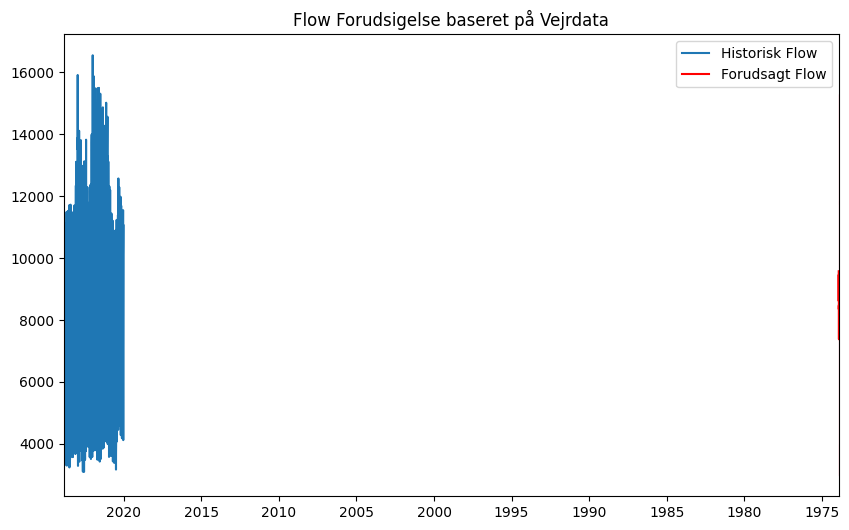

,Forudsagt Flow,Nedre grænse,Øvre grænse
1428,8466.47,5084.64,11848.31
1429,7374.83,3002.78,11746.88
1430,8467.50,3540.60,13394.41
1431,8343.42,3076.01,13610.84
1432,9460.58,3975.66,14945.50
1433,8608.28,2981.31,14235.25
1434,9571.79,3850.74,15292.83


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Indlæser de historiske data
historical_data_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02.csv'
df_historisk = pd.read_csv(historical_data_url, delimiter=';', parse_dates=['Dato'], index_col='Dato')

# Check for 'Flow' column after loading the data
if 'Flow' not in df_historisk.columns:
    raise KeyError("The 'Flow' column is missing from the DataFrame after loading the data.")

# Sørg for at index er en DatetimeIndex og resample til daglig frekvens
df_historisk.index = pd.to_datetime(df_historisk.index)
df_historisk = df_historisk.asfreq('D')

# Check for 'Flow' column after resampling
if 'Flow' not in df_historisk.columns:
    raise KeyError("The 'Flow' column is missing from the DataFrame after resampling.")


# Konverterer 'Flow' og vejrdata til numeriske værdier
df_historisk['Flow'] = pd.to_numeric(df_historisk['Flow'].str.replace(',', '.'), errors='coerce')
exog_data = df_historisk[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce')

# Fjern rækker med NaN værdier efter konvertering
df_historisk.dropna(subset=['Flow'], inplace=True)
exog_data = exog_data.loc[df_historisk.index]  # Sikre at exog_data har samme index som df_historisk

# Kontrollerer at der ikke er nogen NaN værdier tilbage
if exog_data.isnull().any().any():
    exog_data = exog_data.fillna(method='ffill').fillna(method='bfill')  # Frem- og tilbagefyldning
# Check for 'Flow' column before fitting the model
if 'Flow' not in df_historisk.columns:
    raise KeyError("The 'Flow' column is missing from the DataFrame before fitting the model.")

#Forecasting


# Fortsætter med at passe SARIMAX-modellen
sarimax_flow = SARIMAX(df_historisk['Flow'], exog=exog_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
resultater_flow = sarimax_flow.fit()

# The expected number of exogenous variables used in the model fitting
expected_number_of_exog_variables = 3

# The number of steps you want to forecast
forecast_steps = 7

# Indlæser fremtidige vejrudsigt data
vejr_forecast_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02-7day.csv'
df_vejr_forecast = pd.read_csv(vejr_forecast_url, delimiter=';', decimal=',', parse_dates=['Dato'], index_col='Dato')

# Forbereder de fremtidige vejrdata
exog_forecast = df_vejr_forecast[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce').dropna()

# Select the correct number of rows for the forecast
exog_forecast = exog_forecast.iloc[:forecast_steps]

# Now you can use this variable in your checks
if exog_forecast.shape[0] != forecast_steps or exog_forecast.shape[1] != expected_number_of_exog_variables:
    raise ValueError(f"Exogene data skal have formen ({forecast_steps}, {expected_number_of_exog_variables}).")





# Hvis 'exog_forecast' passer med forventningerne, fortsæt til forudsigelsen
forecast = resultater_flow.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the historical and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df_historisk['Flow'], label='Historisk Flow')
plt.plot(forecast_values.index, forecast_values, label='Forudsagt Flow', color='red')

# Set x-axis limits to better visualize the forecast
# Adjust these limits as necessary to focus on the forecast period
plt.xlim([df_historisk.index[-30], forecast_values.index[-1]])

plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Flow Forudsigelse baseret på Vejrdata')
plt.legend()
plt.show()


# Opretter en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({
    'Forudsagt Flow': forecast_values,
    'Nedre grænse': forecast_conf_int.iloc[:, 0],
    'Øvre grænse': forecast_conf_int.iloc[:, 1]
}).dropna()

# Viser forudsigelsesdataen
forecast_data_formatted = forecast_data.style.format({
    'Forudsagt Flow': '{:.2f}',
    'Nedre grænse': '{:.2f}',
    'Øvre grænse': '{:.2f}'
})

# Viser forudsigelsesdataen
forecast_data_formatted


Denne er kode giver en resulat men det passer ikke så godt og visualisering er dårlig


#### Trænings data basiert på vejert - version 2  - YMA

Prøver at for rettet nogen ting både i datasæt men også i koden

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'fopt': 7.602921562276864, 'iterations': 500, 'fcalls': 742, 'warnflag': 2, 'converged': False}


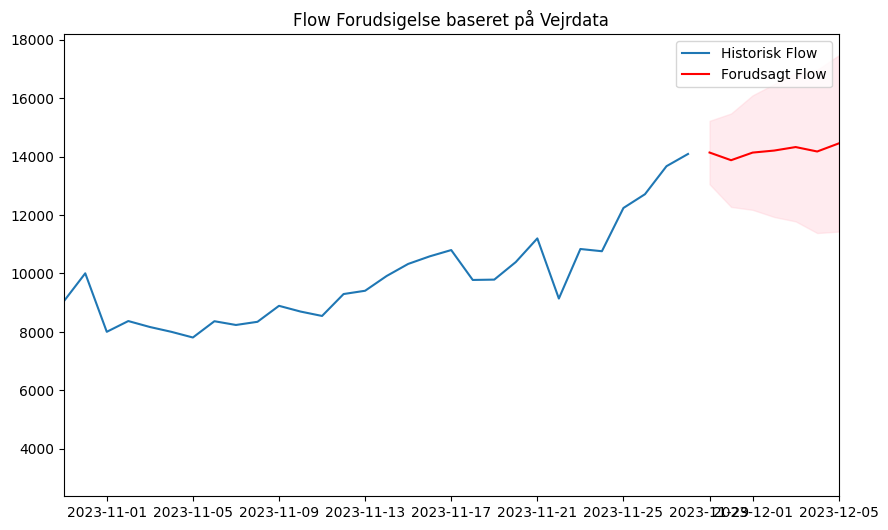

        Dato  Forudsagt Flow  Nedre grænse  Øvre grænse
0 2023-11-29           14141         13056        15226
1 2023-11-30           13879         12280        15477
2 2023-12-01           14139         12179        16100
3 2023-12-02           14209         11935        16482
4 2023-12-03           14329         11783        16874
5 2023-12-04           14177         11385        16969
6 2023-12-05           14453         11435        17471


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np


# Indlæser den historiske data og sikrer korrekt datotolkning og frekvens
historical_data_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02.csv'
df_historisk = pd.read_csv(
    historical_data_url, delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato'
)
df_historisk = df_historisk.asfreq('D')

# Tjekker om kolonnen 'Flow' findes
if 'Flow' not in df_historisk.columns:
    raise KeyError("Kolonnen 'Flow' mangler i DataFrame efter indlæsning af data.")

# Konverterer 'Flow' og vejrdata til numeriske værdier
df_historisk['Flow'] = pd.to_numeric(df_historisk['Flow'].str.replace(',', '.'), errors='coerce')
exog_data = df_historisk[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce')

# Fjerner rækker med NaN værdier efter konvertering
df_historisk.dropna(subset=['Flow'], inplace=True)
exog_data = exog_data.loc[df_historisk.index]

# Sikrer at der ikke er nogen manglende værdier i de exogene data
exog_data.ffill().bfill(inplace=True)

# Kontrollerer og håndterer NaNs og uendelige værdier i de exogene data
if exog_data.isnull().any().any():
    exog_data = exog_data.ffill().bfill()

if np.isinf(exog_data.values).any():
    exog_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    exog_data = exog_data.ffill().bfill()

# Hvis der stadig er NaNs eller uendelige værdier, kastes en fejl
if exog_data.isnull().any().any() or np.isinf(exog_data.values).any():
    raise ValueError("De exogene data indeholder stadig NaNs eller uendelige værdier.")


# Fitter SARIMAX-modellen
sarimax_model = SARIMAX(
    df_historisk['Flow'], exog=exog_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False, enforce_invertibility=False
)
results = sarimax_model.fit(maxiter=500, method='nm')
print(results.mle_retvals)  # Udskriver resultaterne af modeltilpasningen

# Indlæser vejrudsigt data til forudsigelse
vejr_forecast_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02-7day.csv'
df_vejr_forecast = pd.read_csv(vejr_forecast_url, delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Forbereder fremtidig vejrdata til forudsigelse
exog_forecast = df_vejr_forecast[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce')
exog_forecast.ffill(inplace=True)
exog_forecast.bfill(inplace=True)

# Tjekker om der er tilstrækkelig med data til forudsigelsen
forecast_steps = 7  # Antallet af skridt vi ønsker at forudsige
if exog_forecast.shape[0] < forecast_steps:
    raise ValueError(f"Ikke nok data til at forudsige {forecast_steps} skridt. Kun {exog_forecast.shape[0]} skridt tilgængelige.")

exog_forecast = exog_forecast.iloc[:forecast_steps]  # Vælger det korrekte antal rækker til forudsigelsen

# Udfører forudsigelsen
forecast = results.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotter den historiske og forudsagte data
plt.figure(figsize=(10, 6))
plt.plot(df_historisk['Flow'], label='Historisk Flow')
plt.plot(forecast_values.index, forecast_values, label='Forudsagt Flow', color='red')
plt.xlim([df_historisk.index[-30], forecast_values.index[-1]])
plt.fill_between(
    forecast_values.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
    color='pink', alpha=0.3
)
plt.title('Flow Forudsigelse baseret på Vejrdata')
plt.legend()
plt.show()

# Opretter en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({
    'Forudsagt Flow': forecast_values,
    'Nedre grænse': forecast_conf_int.iloc[:, 0],
    'Øvre grænse': forecast_conf_int.iloc[:, 1]
}).reset_index()

# Omdøber kolonner for klarhed
forecast_data.rename(columns={'index': 'Dato'}, inplace=True)

# To round specific columns and convert to integer
forecast_data['Forudsagt Flow'] = forecast_data['Forudsagt Flow'].round(0).astype(int)
forecast_data['Nedre grænse'] = forecast_data['Nedre grænse'].round(0).astype(int)
forecast_data['Øvre grænse'] = forecast_data['Øvre grænse'].round(0).astype(int)

# Now 'forecast_data' contains integer-rounded values only for specified columns
print(forecast_data)



/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'fopt': 11.342485565622987, 'iterations': 500, 'fcalls': 731, 'warnflag': 2, 'converged': False}


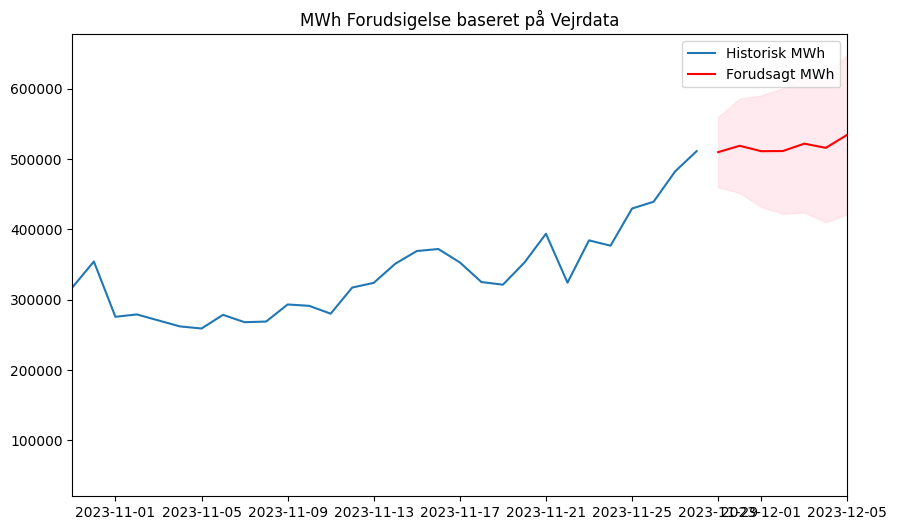

        Dato  Forudsagt MWh  Nedre grænse  Øvre grænse
0 2023-11-29         509904        459923       559884
1 2023-11-30         518914        451811       586016
2 2023-12-01         511230        431967       590494
3 2023-12-02         511447        422251       600643
4 2023-12-03         521936        424072       619801
5 2023-12-04         515987        410281       621692
6 2023-12-05         534642        421694       647589


In [ ]:

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np


# Indlæser den historiske data og sikrer korrekt datotolkning og frekvens
historical_data_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02.csv'
df_historisk = pd.read_csv(
    historical_data_url, delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato'
)
df_historisk = df_historisk.asfreq('D')

# Tjekker om kolonnen 'MWh' findes
if 'MWh' not in df_historisk.columns:
    raise KeyError("Kolonnen 'MWh' mangler i DataFrame efter indlæsning af data.")

# Konverterer 'MWh' og vejrdata til numeriske værdier
df_historisk['MWh'] = pd.to_numeric(df_historisk['MWh'].str.replace(',', '.'), errors='coerce')
exog_data = df_historisk[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce')

# Fjerner rækker med NaN værdier efter konvertering
df_historisk.dropna(subset=['MWh'], inplace=True)
exog_data = exog_data.loc[df_historisk.index]

# Sikrer at der ikke er nogen manglende værdier i de exogene data
exog_data.ffill().bfill(inplace=True)

# Kontrollerer og håndterer NaNs og uendelige værdier i de exogene data
if exog_data.isnull().any().any():
    exog_data = exog_data.ffill().bfill()

if np.isinf(exog_data.values).any():
    exog_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    exog_data = exog_data.ffill().bfill()

# Hvis der stadig er NaNs eller uendelige værdier, kastes en fejl
if exog_data.isnull().any().any() or np.isinf(exog_data.values).any():
    raise ValueError("De exogene data indeholder stadig NaNs eller uendelige værdier.")


# Fitter SARIMAX-modellen
sarimax_model = SARIMAX(
    df_historisk['MWh'], exog=exog_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False, enforce_invertibility=False
)
results = sarimax_model.fit(maxiter=500, method='nm')
print(results.mle_retvals)  # Udskriver resultaterne af modeltilpasningen

# Indlæser vejrudsigt data til forudsigelse
vejr_forecast_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/EksamenDataTest02-7day.csv'
df_vejr_forecast = pd.read_csv(vejr_forecast_url, delimiter=';', parse_dates=['Dato'], dayfirst=True, index_col='Dato')

# Forbereder fremtidig vejrdata til forudsigelse
exog_forecast = df_vejr_forecast[['Wind', 'Temp', 'Sun']].apply(pd.to_numeric, errors='coerce')
exog_forecast.ffill(inplace=True)
exog_forecast.bfill(inplace=True)

# Tjekker om der er tilstrækkelig med data til forudsigelsen
forecast_steps = 7  # Antallet af skridt vi ønsker at forudsige
if exog_forecast.shape[0] < forecast_steps:
    raise ValueError(f"Ikke nok data til at forudsige {forecast_steps} skridt. Kun {exog_forecast.shape[0]} skridt tilgængelige.")

exog_forecast = exog_forecast.iloc[:forecast_steps]  # Vælger det korrekte antal rækker til forudsigelsen

# Udfører forudsigelsen
forecast = results.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotter den historiske og forudsagte data
plt.figure(figsize=(10, 6))
plt.plot(df_historisk['MWh'], label='Historisk MWh')
plt.plot(forecast_values.index, forecast_values, label='Forudsagt MWh', color='red')
plt.xlim([df_historisk.index[-30], forecast_values.index[-1]])
plt.fill_between(
    forecast_values.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
    color='pink', alpha=0.3
)
plt.title('MWh Forudsigelse baseret på Vejrdata')
plt.legend()
plt.show()

# Opretter en DataFrame for at vise forudsigelsen og konfidensintervaller
forecast_data = pd.DataFrame({
    'Forudsagt MWh': forecast_values,
    'Nedre grænse': forecast_conf_int.iloc[:, 0],
    'Øvre grænse': forecast_conf_int.iloc[:, 1]
}).reset_index()

# Omdøber kolonner for klarhed
forecast_data.rename(columns={'index': 'Dato'}, inplace=True)

# To round specific columns and convert to integer
forecast_data['Forudsagt MWh'] = forecast_data['Forudsagt MWh'].round(0).astype(int)
forecast_data['Nedre grænse'] = forecast_data['Nedre grænse'].round(0).astype(int)
forecast_data['Øvre grænse'] = forecast_data['Øvre grænse'].round(0).astype(int)

# Now 'forecast_data' contains integer-rounded values only for specified columns
print(forecast_data)




Denne kode giver en meget brede resulat, både for Flow men også for MWh

#Diskussion

###Valg af programmeringssprog
YMA

**Begrundelse for valget af Python over C# i vores projekt**


1.	Mange biblioteker og frameworks:
Python er fremtrædende inden for dataanalyse, maskinlæring og kunstig intelligens takket være biblioteker som NumPy, Pandas, TensorFlow og scikit-learn. Disse værktøjer tilbyder avancerede funktioner, der er direkte relevante for vores projekt, specielt i forbindelse med datahåndtering og forudsigelsesmodellering.
2.	Hurtig udviklingscyklus: Pythons syntaks er klar og koncis, hvilket fremmer hurtig udvikling og prototyping. Denne effektivitet er vital for vores projekt, da det tillader os at teste nye ideer og foretage iterationer hurtigt.
3.	Stærkt community og support: Python har et globalt netværk, som bidrager til et omfattende system af dokumentation, tutorials og fora. Denne støtte er uvurderlig for problemløsning og indlæring under projektudviklingen.
4.	Interoperabilitet og fleksibilitet: Python kan let integreres med andre sprog og systemer, hvilket er vigtigt for vores projekt, der indebærer integration med forskellige datakilder og systemer.
5.	Platformuafhængighed: Python kører problemfrit på flere platforme som Windows, macOS og Linux, hvilket giver os fleksibilitet i softwareudviklingen.


Hovedopgaven bliver som regel brugt til at afgøre, om man har lært noget i løbet af uddannelsen. I vores tilfælde bliver den nok brugt til at vise hvor omstillingsparate og lærenemme vi er og hvor alsidig uddannelsen kan være!

De første 3 semestre drejede det sig om programmering i C#, microservices, unit testing og UML diagrammer og alt det andet, der er forbundet med at læse til datamatiker. På fjerde semester ændrede vi ret drastisk kurs, da vi fik muligheden for at komme i praktik i en forsynigsvirksomhed, hvor vores stillingsbetegnelse var dataanalytiker.

Som dataanalytiker bruger man andre værktøjer, programmeringssprog og tankegange, så allerede der ændrede vi kurs første gang. Vi skulle lære at bruge programmer, som andre datamatikere havde udviklet over tid og vi blev sat ind i alt omkring elopsætninger, solceller, forbrug og produktion og meget mere. Efter at have arbejdet med det i 8 måneder, skulle vi have vores problemformulering til hovedopgaven. I den forbindelse fandt GEV ud af, at hvad de virkelig gerne ville have, var en mulighed for at estimere det kommende varmeforbrug til at hjælpe varmemesteren med at komme med en optimal fyringsprofil.

Så vi ændrede kurs igen for at imødekomme deres ønske. Nu skulle vi så til at lære om fjernvarme og hvilke problemer, der er forbundet med produktion og forbrug der. Desuden skulle vi til at arbejde med helt andre databasetabeller inde i vores system og vi skulle lære om time series forecasting, tensorflow og brug af eksterne datasæt.

På papiret er vores projekt meget simpelt, så vi har ikke skulle tage stilling til om det skulle være et domain driven eller test driven program, om det skulle være monolitisk eller bygget op af microservices eller hvilken frontend og backend, der skulle bruges. Der er også kun en aktør, så vi skulle ikke tænke på prioriteringsrækkefølgen. Grundet enkeltheden i vores program, virkede det også lidt som at skyde gråspurve med kanoner at lave et SSD diagram, klassediagram eller andre diagrammer.

Så vi nævner mest en masse en ting, som vi ikke har med, bare for at fortælle, at vi godt ved, at de findes!

###Valg af Scrum metoden frem for andre projektstyringsmetoder
YMA
Valget af Scrum som vores projektstyringsmetode er grundet i flere specifikke fordele, som Scrum tilbyder sammenlignet med andre traditionelle eller agile metoder:
1.	Fleksibilitet og tilpasningsevne: Scrum tillader hurtig tilpasning til ændringer, hvilket er essentielt i vores projekt, hvor kravene kan udvikle sig løbende.
2.	Iterativ udvikling: Med Scrum arbejder vi i faste sprint-cyklusser, der gør det muligt løbende at evaluere og forbedre produktet.
3.	Effektiv prioritering: Scrum fokuserer på at levere de mest værdifulde funktioner først, hvilket sikrer en effektiv brug af ressourcer.
4.	Stærk holdinvolvering: Scrum fremmer et tæt samarbejde i teamet, hvilket forbedrer kommunikationen og forståelsen for projektets mål.




###FURPS og MoSCoW

Selvom MoSCoW-analysen ofte anvendes sammen med FURPS for yderligere at prioritere krav, valgte vi ikke at bruge MoSCoW i dette tilfælde, da vi fandt, at FURPS-modellen alene gav os tilstrækkelig struktur og klarhed til effektivt at identificere og håndtere de funktionelle og ikke-funktionelle aspekter af vores projekt, uden behovet for den ekstra lagdeling af prioriteter, som MoSCoW tilbyder.
Vi fravalgte også +-delen i FURPS, da det er et internt aflæsningsværktøj, der skal køre på lukkede IT-systemer og ikke har mulighed for input.





ER dette relevant

I vores projekt har vi udviklet en softwareløsning, der primært er tiltænkt virksomhedens ledelse. Denne løsning kan klassificeres som en SaaS (Software as a Service), idet den centrale faktor i SaaS er leveringsmetoden og adgangsmåden til softwaren, og ikke specifikt hvem brugerne er. Vores software distribueres via internettet og administreres centralt, hvilket eliminerer behovet for installation på den enkelte brugers computer. Denne tilgang gør softwaren til en SaaS-løsning, der er anvendelig både for en begrænset gruppe af interne brugere samt potentielt et større eksternt publikum.

###Tidsestimering

#Konklusion
ca 10 sider

##Opnåede vi det vi ville?
svar på problemformuleringen

##Gik det godt?

Af en relativ simpel opgaveformulering, opstod der forbavsende mange problemer.

##Perspektivering
KKN

**Kan vi bruge resultatet til andet end at vurdere varmeforbrug?**
<br>
<br>

Når man nu har et redskab, der kan analysere et varmeforbrug i en hel by, vil det så kunne bruges til mere?

Lige nu beregner systemet varmeforbruget for Grindsted på dagsbasis, men når det bliver videreudviklet, kommer det ned på timebasis.

GEV har sektioneret deres vandforsyning og det er også planen at det skal gøres med varmen. På den måde kan man se hvor i byen forbruget er størst og mindst. Det kan man så prøve at sammenligne med alderen på bygningerne, byggematerialer, antal solceller og andre parametre for at se, om der er et tydeligt mønster.

Vil det f.eks. kunne betale sig at efterisolere hele den gamle bydel og skifte vinduer ud med termoruder, installere boligventilation osv.?

Kommer det til at betyde noget for fremtiden, at tman er begyndt at bruge bedre og grønnere materialer?

Det der med at fyre for gråspurvene er jo ikke bare et spørgsmål om ens egen pengepung. Det kan godt være at Hr. Danmark har råd til at have 25 grader i hele huset og have et vindue på klem året rundt for at få frisk luft ind, men det betyder jo, at der skal produceres så meget mere varme for at dække behovet i byen og det går ud over Fru Danmarks pengepung og det belaster også miljøet mere end det er nødvendigt, for så skal der skaffes mere flis, der skal transporteres i lastbiler og der skal skaffes mere strøm fra vindmøller, der skal stå i en eller andens baghave og jo mere strøm, der skal bruges jo mere belastning, kommer der på elnettet, der så skal opgraderes.

Så selvom man ikke har et abonnement, der afregner efter forbrugstidspunkt, er det alligevel vigtigt at overveje, hvornår man tænder for opvaskemaskinen eller tørretumbleren, da strøm jo skal forbruges umiddelbart efter, at det er produceret, så jo mere forbruget bliver fordelt ud over hele døgnet, jo billigere bliver det for alle og jo mindre bliver miljøet belastet.

#Litteraturliste

##Bøger

Bogen om C# af Michell Cronenberg

C# A beginners tutorial af Jayden Ky

Visual C# - How to program af Deitel & Deitel

Applying UML and Patterns af Craig Larman

Fundamentals of Database systems af Elmasri Navathe

Beginning Software engineering af Rod Stephens

ASP.NET Core in action af Andrew Lock

ASP.NET Core Razor Pages in Action af Mike Brind

Machine learning for absolute beginners

Jurafsky, D., & Martin, J. H. (2019). Speech and language processing. An introduction to natural language processing, computational linguistics, and speech recognition (3rd ed.). Pearson. Lokaliseret 2. feb. 2023

Kurose, Ross: Computer Networking (udvalgte sider) (CN): part 1, 2, 3

NET-Microservices-Architecture-for-Containerized-NET-Applications

Entity Framework Core in Action, Second Edition



##Artikler

https://www.billund.dk/media/1sbjj5yq/varmeplan-2022-billund-kommune-godkendt-13122022.pdf. Lokaliseret d 22/11-23

https://www.billund-varme.dk/media/44968/energicenter_projektbeskrivelse.pdf. Lokaliseret 22/11-23

https://www.sas.com/da_dk/insights/analytics/what-is-artificial-intelligence.html Lokaliseret 19. jan. 2023

Datavask: https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning Lokaliseret 1. feb. 2023.



Hvad er ML: https://simplecode.dk/hvad-er-machine-learning/ Lokaliseret 11. feb. 2023

Note om estimering: ”kap 10 estimering.pdf”, Note af Andreas Munk Madsen om estimering. Lokaliseret 20/11-2023

Note: kap.7.Estimering.pdf Lokaliseret 20/11-2023

Note: AzureDevOpsExplained.pdf (extensivt – skal orientere jer I delene vedr AZURE-board, kap.2) Lokaliseret 20/11-2023

Note: Todd Little, Note: Alistair Cockburn, Note: Reneaud & Isabelle (Larmans metodeklassifikation) Lokaliseret 20/11-2023

Note: Roger S. Pressmann: Software Configuration Management, kap.22
using_risk_to_balance_agile_and_plan-_driven_methods.pdf Lokaliseret 20/11-2023

Tanenbaum: Client Server arkitekturen.pdf Lokaliseret 20/11-2023

https://martinfowler.com/articles/microservices.html Lokaliseret 20/11-2023

https://modlogix.com/blog/ Lokaliseret 20/11-2023

docker-desktop-alternatives-changes-in-licensing-and-new-pricing-policy/ Lokaliseret 20/11-2023

www.geeksforgeeks.org/containerization-using-docker/?ref=lbp Lokaliseret 20/11-2023

https://docs.docker.com/get-started/overview/#containers Lokaliseret 20/11-2023

https://docs.github.com/en/codespaces/overview Lokaliseret 20/11-2023

https://docs.docker.com/config/containers/container-networking/ Lokaliseret 20/11-2023

https://docs.docker.com/docker-hub/ www.c-sharpcorner.com/article/run-and-test-asp-net-core-web-api-docker-container-locally/ Lokaliseret 20/11-2023

A.S. Tanenbaum: Distributed Systems: Afsnit 1.5 (7 siders note) Lokaliseret 20/11-2023

https://martinfowler.com/articles/microservices.html Lokaliseret 20/11-2023

https://martinfowler.com/bliki/MonolithFirst.html Lokaliseret 20/11-2023

https://en.wikipedia.org/wiki/Systems_architecture Lokaliseret 20/11-2023

https://www.bmc.com/blogs/saas-vs-paas-vs-iaas-whats-the-difference-and-how-to-choose/ Lokaliseret 20/11-2023


##Videoer

<br>

*Alle lokaliseret mellem september 2021 og december 2023*


Video om unsupervised (20 min.): https://youtu.be/yzG69Zf0U1k Lokaliseret marts 2023

Video om både super- og unsupevised: https://www.simplilearn.com/tutorials/machine-learning-tutorial/supervised-and-unsupervised-learning Lokaliseret marts 2023



LinkedInLearning:


HTML Essential Training

CSS Essential Training

Bootstrap 5 Essential Training

ASP.NET Core: Razor Pages - Authentication vs. authorization

Learning REST API's

Learning PowerBI desktop

PowerBI Data Modeling with DAX

HTTP Essential Training

Using Docker and .NET Core

Database foundations: Intro to Databases


DataCamp learning track:
Data Analyst in Power BI



##Web

https://www.gev.dk/fjernvarme/ Lokaliseret 20/11-2023

Intro til Python: https://www.datacamp.com/courses/intro-to-python-for-data-science?utm_source=learnpython_com&utm_campaign=learnpython_tutorials Lokaliseret 20/11-2023


http://agilemanifesto.org/ Lokaliseret 20/11-2023

http://agilemanifesto.org/iso/dk/manifesto.html Lokaliseret 20/11-2023

http://www.extremeprogramming.org/ Lokaliseret 20/11-2023

http://www.extremeprogramming.org/rules/userstories.html Lokaliseret 20/11-2023

http://www.extremeprogramming.org/start.html Lokaliseret 20/11-2023

http://www.extremeprogramming.org/values.html Lokaliseret 20/11-2023

https://www.planningpoker.com/ Lokaliseret 20/11-2023

en.wikipedia.org/wiki/burndown_chart Lokaliseret 20/11-2023

www.scrum.org (SCRUM Guides 2020, november), se specielt den Danske SCRUM guide. Lokaliseret 20/11-2023

www.scrumguides.org/download.html Lokaliseret 20/11-2023

www.madstroelshansen.com/hvad-er-scrum Lokaliseret 20/11-2023

https://scrumguides.org/docs/scrumguide/v2020/2020-Scrum-Guide-Danish.pdf Lokaliseret 20/11-2023

https://docs.microsoft.com/en-us/azure/devops/test/perform-exploratory-tests?view=azure-devops Lokaliseret 20/11-2023




#Bilag
Kun dem der er centrale for rapporten.

##Kode til UML

@startuml
' Define the Location entity
entity Location {
  + LocationID : int
  --
  CityName : varchar
  Country : varchar
  Latitude : float
  Longitude : float
}

' Define the WeatherRecord entity
entity WeatherRecord {
  + RecordID : int
  # LocationID : int
  --
  Date : date
  Sunrise : time
  Sunset : time
}

' Define the Temperature entity
entity Temperature {
  + TemperatureID : int
  # RecordID : int
  --
  MaxTemp : float
  MinTemp : float
  AvgTemp : float
}

' Define the Wind entity
entity Wind {
  + WindID : int
  # RecordID : int
  --
  Speed : float
  Direction : varchar
}

' Define relationships
Location ||--o{ WeatherRecord
WeatherRecord ||--o{ Temperature
WeatherRecord ||--o{ Wind
@enduml


###User Stories projektet YMA


- Som en dataanalytiker ønsker jeg at hente 7 dages vejrudsigt, så jeg kan bruge data til prognosemodellering.
- Som en systemadministrator ønsker jeg at indsamle 3 års historiske vejrdata, så jeg kan træne min prognosemodel.
- Som en forretningsanalytiker ønsker jeg at integrere virksomhedsdata med vejrdata, så jeg kan forstå påvirkningen af vejret på forbrug.
- Som en dataforsker ønsker jeg at anvende en maskinlæringsalgoritme for at forudsige fjernvarmeforbruget, så jeg kan hjælpe med at optimere ressourceallokering.
- Som en beslutningstager ønsker jeg at se prognoser og analyser i Power BI, så jeg kan træffe informerede beslutninger.

##Kode til mere UML

@startuml

package "Dataindsamling" {
    [Hent 7 Dages Vejrudsigt] as Forecast7Days
    [Hent 3 Års Historiske Data] as History3Years
}

database "Dataopbevaring" {
    frame "Vejrdata" {
        [Gem Vejrdata]
    }
    frame "Virksomhedsdata" {
        [Gem Virksomhedsdata]
    }
    frame "Forudsigelsesresultater" {
        [Gem Forudsigelsesresultater]
    }
}

package "Dataintegration" {
    [Integrer Virksomhedsdata] as IntegrateData
}

package "Maskinlæring" {
    [Forudsigelse af Fjernvarmeforbrug] as MLAlgorithm
}

package "Datavisualisering" {
    [Visualiser med Power BI] as VisualizePowerBI
}

Forecast7Days --> "Gem Vejrdata"
History3Years --> "Gem Vejrdata"
IntegrateData --> "Gem Virksomhedsdata"
MLAlgorithm --> "Gem Forudsigelsesresultater"
"Gem Forudsigelsesresultater" --> VisualizePowerBI

@enduml

In [ ]:
#Skjul koden til billedet
from IPython.display import HTML

# Replace 'image_url' with the raw URL of your image file on GitHub
image_url = 'https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/Slettes.png'

# Hide the code cell
HTML(f'''
    <div>
        <img src="{image_url}" alt="Image">
    </div>
    <script>
        code_show=false;
        function code_toggle() {{
            if (code_show) {{
                $('div.input').hide();
            }} else {{
                $('div.input').show();
            }}
            code_show = !code_show
        }}
        $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()">
        <input type="submit" value="Click here to toggle code on/off.">
    </form>
''')




In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Retrieve the image
response = requests.get('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/Tabeludsnit.png')
#response = requests.get('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/SQLSearch.png')


# Check if the request was successful
if response.status_code == 200:
    # Open the image
    img = Image.open(BytesIO(response.content))

    # Save the image to the Colab filesystem
    img.save('/content/tabeludsnit.png')
    #img.save('/content/SQLSearch.png')

    # Display the image using Colab's file system
   # from google.colab.patches import cv2_imshow
   # import cv2
   # image = cv2.imread('/content/tabeludsnit.png')
    #cv2_imshow(image)


In [ ]:
img = Image.open('/content/tabeludsnit.png')
display(img)

In [ ]:
img = Image.open('/content/SQLSearch.png')
display(img)

In [ ]:
Image("Tabeludsnit.png")

In [ ]:
from IPython.display import Image
Image("/content/SQLudsogning.png")

In [ ]:
from google.colab import files
from IPython.display import Image
uploades = files.upload()

##Hele prototypen

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/KarinKnopper/HovedopgaveGEV/main/vaskede_data3.csv')

df = df.dropna()

# Convert 'Dato' to datetime
df['Dato'] = pd.to_datetime(df['Dato'])

# Set 'Dato' as the index for time series analysis
df.set_index('Dato', inplace=True)

# Display the first few rows to understand the structure of the data
df.head()


,Temperatur,Middelvind,Solskin,Forbrug
Dato,,,,
2023-10-01,13.2,2.2,0.7,118
2023-10-02,16.1,2.5,0.4,92
2023-10-03,13.9,4.3,0.6,107
2023-10-04,13.1,6.3,4.3,113
2023-10-05,12.3,4.8,5.7,106


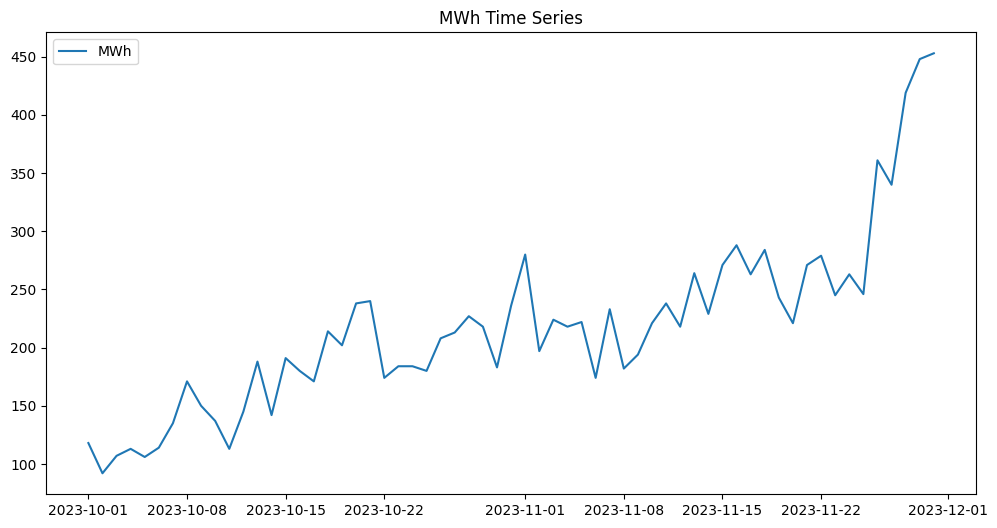

In [ ]:
import matplotlib.pyplot as plt

# Plot MWh
plt.figure(figsize=(12, 6))
plt.plot(df['Forbrug'], label='MWh')
plt.title('MWh Time Series')
plt.legend()
plt.show()

In [ ]:
# Use the last 20% as test
test_size = 0.2
split_index = int(len(df) * (1 - test_size))

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]


In [ ]:
features = ['Temperatur', 'Middelvind', 'Solskin']

X_train = train_df[features]
y_train_mwh = train_df['Forbrug']

X_test = test_df[features]
y_test_mwh = test_df['Forbrug']

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: SARIMAX for MWh
model_mwh = SARIMAX(y_train_mwh, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_mwh = model_mwh.fit()

In [ ]:
# Example: Predictions for MWh
predictions_mwh = results_mwh.get_forecast(steps=len(test_df))
pred_mean_mwh = predictions_mwh.predicted_mean

# Evaluate the models
from sklearn.metrics import mean_squared_error

mse_mwh = mean_squared_error(y_test_mwh, pred_mean_mwh)


print(f'MSE for MWh: {mse_mwh}')

MSE for MWh: 5552.822731371096


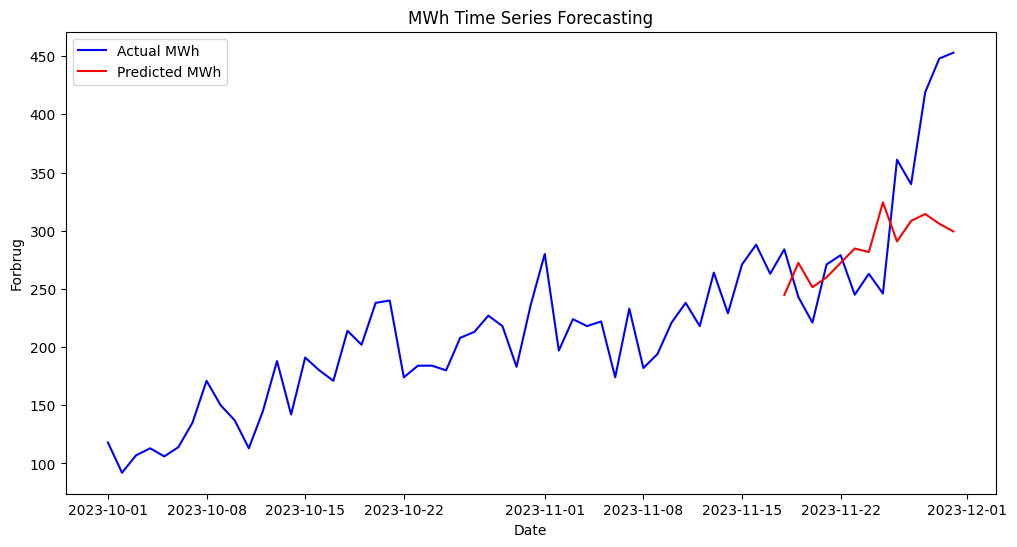

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Plot MWh
plt.figure(figsize=(12, 6))

# Plot actual MWh values
plt.plot(df.index, df['Forbrug'], label='Actual MWh', color='blue')

# Plot predicted MWh values
plt.plot(pred_mean_mwh.index, pred_mean_mwh, label='Predicted MWh', color='red')

plt.title('MWh Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Forbrug')
plt.legend()
plt.show()